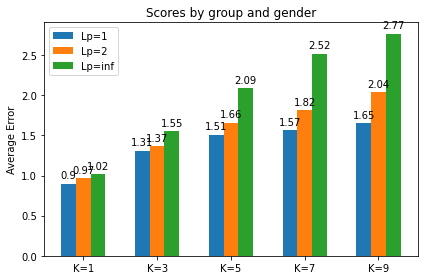

In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt

data_file = open("two_circle.txt", "r")
x_y_data = []
color_data = []
for line in data_file:
    curr_line = line.split()
    x_y_data.append([float(curr_line[0]), float(curr_line[1])])
    color_data.append(int(curr_line[2]))
data_file.close()
colors = ["blue", "red"]
n = len(x_y_data)


def split_to_train_test():
    S = []
    S_color = []
    T = []
    T_color = []
    for i in range(n):
        if (random.getrandbits(1) == 1 and len(S) < (n / 2)) or len(T) >= (n / 2):
            S.append(x_y_data[i])
            S_color.append(color_data[i])
        else:
            T.append(x_y_data[i])
            T_color.append(color_data[i])

    return np.array(S), np.array(T), np.array(S_color), np.array(T_color)


# Source: https://realpython.com/knn-python/
def knn_algorithm(train: np.ndarray, train_color: np.ndarray, test: np.ndarray, k_param, p_param: int):
    test_color = []
    for point in test:
        # Distances form point to each point in train
        distances = np.linalg.norm(train - point, p_param, axis=1)
        # K shortest distances id
        nearest_neighbor_ids = distances.argsort()[:k_param]
        # Color of K shortest distances id
        nearest_neighbor_rings = train_color[nearest_neighbor_ids]
        # Add the most often appears color
        test_color.append(np.bincount(nearest_neighbor_rings + 1).argmax() - 1)
    return np.array(test_color).astype(int)


if __name__ == "__main__":
    run_size = 100
    k_set = [1, 3, 5, 7, 9]
    p_set = [1, 2, np.inf]
    result = np.zeros((len(p_set), len(k_set)))
    for _ in range(run_size):
        # Split the data
        S, T, S_color, T_color = split_to_train_test()
        # Run k-Nearest Neighbors (kNN) Algorithm
        for k_index in range(len(k_set)):
            for p_index in range(len(p_set)):
                T_color_result = knn_algorithm(S, S_color, T, k_set[k_index], p_set[p_index])
                result[p_index, k_index] += np.count_nonzero(np.absolute(T_color_result - T_color))

    # Calculate the average error
    result /= run_size
    # Show the result on chart
    labels = ['K=1', 'K=3', 'K=5', 'K=7', 'K=9']
    Lp1 = result[0]
    Lp2 = result[1]
    Lp_inf = result[2]

    x = np.arange(len(labels))  # the label locations
    width = 0.2  # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width, Lp1, width, label='Lp=1')
    rects2 = ax.bar(x, Lp2, width, label='Lp=2')
    rects3 = ax.bar(x + width, Lp_inf, width, label='Lp=inf')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Average Error')
    ax.set_title('Scores by group and gender')
    ax.set_xticks(x, labels)
    ax.legend()

    ax.bar_label(rects1, padding=3)
    ax.bar_label(rects2, padding=3)
    ax.bar_label(rects3, padding=3)

    fig.tight_layout()

    plt.show()
